# 迭代器

有一些Python对象，我们可以从中按一定次序提取出其中的元素,这些对象称之为 **可迭代对象**。  
比如，字符串、列表、元组都是可迭代对象。

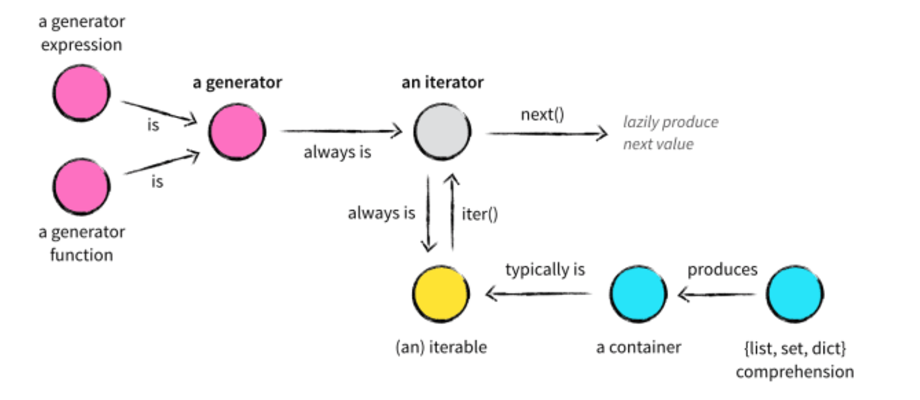
container, 容器，指集合类对象，如list, set, dict，它们将多个元素组织在一起，这些对象可以称为container

In [1]:
#字符串
my_str = 'abc'
for i,_ in enumerate(my_str):
    print(my_str[i])

a
b
c


In [3]:
# 列表
my_list = [1,2,3]
for i,_ in enumerate(my_list):
    my_list[i] = my_list[i] + 1
print(my_list)

[2, 3, 4]


上面的列子元素的提取主要是把下标作为参数，通过操作符[]实现；  
而**迭代器模式**元素的提取只和下标打交道，而和可迭代对象无关。迭代器模式适合以下情形：  
- 不关心元素的随机访问
- 元素的个数不可提前预测

In [ ]:
# 显示使用迭代器
my_list = [1,2,3]
i = iter(my_list)
while True:
    try:
        print(next(i))
    except StopIteration:
        pass

1
2
3


一旦迭代器建立起来，元素的提取过程不再依赖于原始的可迭代对象，而仅仅依赖于迭代器本身。  
python内建的next函数作用于迭代器上，会执行三个操作：
- 返回当前**位置**的元素，第一次next调用，当前位置是可迭代对象的起始位置
- 将**位置**向后递增
- 如果到达可迭代对象的末尾，则跑出StopIteration异常  

在实际运用中，python中的循环语句会自动进行迭代器的建立，next的调用和StopIteration异常的处理，也就是说，遍历一个可迭代对象的元素，直接写：  

    my_list = [1,2,3]  
    for v in my_list:  
        print(v)   
Python的for ... in 包含了很大的细节。

## itertools创建迭代器

In [1]:
# 生成无限序列
from itertools import count
counter = count(start=13,step=2)
next(counter)
next(counter)

15

In [28]:
# 生成循环
from itertools import cycle
colors = cycle(['red','white','blue'])
print(next(colors))
print(next(colors))
print(next(colors))
print(next(colors))

red
white
blue
red


In [3]:
#  生成重复
from itertools import repeat
rep = repeat(10,5)
print(next(rep))
print(next(rep))

10
10


In [29]:
# 从无限的序列中生成有限序列
from itertools import islice
colors = cycle(['red','white','blue'])  # infinite 
limited = islice(colors,0,4)            # finite
for x in limited:
    print(x)

red
white
blue
red


In [10]:
# chain(p,q)
# 迭代至序列p的最后一个元素后，从q的第一个元素开始，直到所有序列终止。
from itertools import chain
[x for x in chain('abc','defg')]

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [7]:
# compress(data, selectors) 
# 如果bool(selectors[n])为True，则next()返回data[n]，否则跳过data[n]。 
from itertools import compress
[x for x in compress('ABCDEF', [1,0,1,0,1,1])]

['A', 'C', 'E', 'F']

In [13]:
# 对数据进行分组
from itertools import groupby
x = groupby(range(10),lambda x: x<5 or x>8)
for condition, numbers in x:
    print(condition,list(numbers))

True [0, 1, 2, 3, 4]
False [5, 6, 7, 8]
True [9]


## 自定义迭代器 

In [31]:
import random

class demo_iterator(object):
    def __next__(self):
        return self.next()
    
    
    #  兼容Python 2.x
    def next(self):     
        v = random.randint(0,10)        ## next方法中 需要抛出异常
        if v < 5:
            raise StopIteration()
        else:
            return v
    
class demo_iterable(object):
    def __iter__(self):
        return demo_iterator()   #  在__iter__方法中返回一个对象，这个对象拥有next方法
    
for v in demo_iterable():
    print(v)

10
5
7
6
9


In [37]:
# case 2：斐波拉契数列
class Fib:
    def __init__(self):
        self.prev = 0
        self.curr = 1
    def __iter__(self):
        return self
    def __next__(self):
        value = self.curr
        self.curr += self.prev
        self.prev = value
        return value
f = Fib()
list(islice(f,0,10))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

# 生成器

生成器算得上是Python语言中最吸引人的特性之一，生成器其实是一种特殊的迭代器，不过这种迭代器更加优雅。  
它不需要再像上面的类一样写__iter__()和__next__()方法，只需要一个yiled关键字。  
生成器中使用关键字** *yield* **返回值

In [80]:
def func():
    n = 1
    while True:
        yield n*2
        n +=1
g = func()
print(list(islice(g,0,15)))
for value in islice(g,0,4):
    print(value)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
32
34
36
38


生成器比迭代器简洁，同时在性能上一样高效

In [53]:
def fib():
    prev,curr = 0,1
    while True:
        yield curr
        prev,curr = curr, curr+prev
f = fib()
list(islice(f,0,10))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

## 生成器表达式

In [61]:
g = (x*2 for x in range(10))
type(g)

generator

In [62]:
print(g)

<generator object <genexpr> at 0x0540BB10>


In [68]:
list(islice(g,0,6))

[0, 2, 4, 6, 8, 10]

In [65]:
l = [x*2 for x in range(10)]
print(type(l))
print(l)

<class 'list'>
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
